In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [5]:
%pip install pydeseq2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 7.4 MB/s eta 0:00:00


In [6]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [22]:
counts = pd.read_csv('GSE250323.csv')
counts

,transcript_id,OE_1,OE_2,OE_3,Vector_1,Vector_2,Vector_3
0,ENST00000618881,0,0,0,0,0.0,0.0
1,ENST00000618882,0,0,0,0,0.0,0.0
2,ENST00000642498,1025,626,435,456,272.0,772.0
3,ENST00000618885,0,0,0,0,0.0,0.0
4,ENST00000618886,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
209350,ENST00000702123,0,0,0,1,0.0,0.0
209351,ENST00000410980,0,0,0,0,0.0,0.0
209352,ENST00000332955,21,25,9,16,23.0,10.0
209353,ENST00000332954,5,2,3,0,1.0,0.0


In [23]:
counts = counts.set_index('transcript_id')
counts

,OE_1,OE_2,OE_3,Vector_1,Vector_2,Vector_3
transcript_id,,,,,,
ENST00000618881,0,0,0,0,0.0,0.0
ENST00000618882,0,0,0,0,0.0,0.0
ENST00000642498,1025,626,435,456,272.0,772.0
ENST00000618885,0,0,0,0,0.0,0.0
ENST00000618886,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...
ENST00000702123,0,0,0,1,0.0,0.0
ENST00000410980,0,0,0,0,0.0,0.0
ENST00000332955,21,25,9,16,23.0,10.0


In [24]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,OE_1,OE_2,OE_3,Vector_1,Vector_2,Vector_3
transcript_id,,,,,,
ENST00000642498,1025,626,435,456,272.0,772.0
ENST00000618889,3,22,1,2,6.0,0.0
ENST00000642492,5,7,6,3,51.0,7.0
ENST00000496116,0,0,2,2,2.0,0.0
ENST00000496114,2,1,1,1,3.0,0.0
...,...,...,...,...,...,...
ENST00000687726,49,39,35,22,57.0,25.0
ENST00000702123,0,0,0,1,0.0,0.0
ENST00000332955,21,25,9,16,23.0,10.0


In [25]:
counts=counts.dropna()

In [26]:
counts

,OE_1,OE_2,OE_3,Vector_1,Vector_2,Vector_3
transcript_id,,,,,,
ENST00000642498,1025,626,435,456,272.0,772.0
ENST00000618889,3,22,1,2,6.0,0.0
ENST00000642492,5,7,6,3,51.0,7.0
ENST00000496116,0,0,2,2,2.0,0.0
ENST00000496114,2,1,1,1,3.0,0.0
...,...,...,...,...,...,...
ENST00000339282,163,178,164,183,111.0,212.0
ENST00000687726,49,39,35,22,57.0,25.0
ENST00000702123,0,0,0,1,0.0,0.0


Correlation Matrix:
              OE_1      OE_2      OE_3  Vector_1  Vector_2  Vector_3
OE_1      1.000000  0.981824  0.986080  0.967696  0.965896  0.962694
OE_2      0.981824  1.000000  0.983097  0.964405  0.962646  0.963768
OE_3      0.986080  0.983097  1.000000  0.969303  0.968836  0.964879
Vector_1  0.967696  0.964405  0.969303  1.000000  0.991031  0.989473
Vector_2  0.965896  0.962646  0.968836  0.991031  1.000000  0.991973
Vector_3  0.962694  0.963768  0.964879  0.989473  0.991973  1.000000

Pearson Correlation:
OE_1 vs OE_2: 0.982
OE_1 vs OE_3: 0.986
OE_2 vs OE_3: 0.983
OE_3 vs OE_2: 0.983


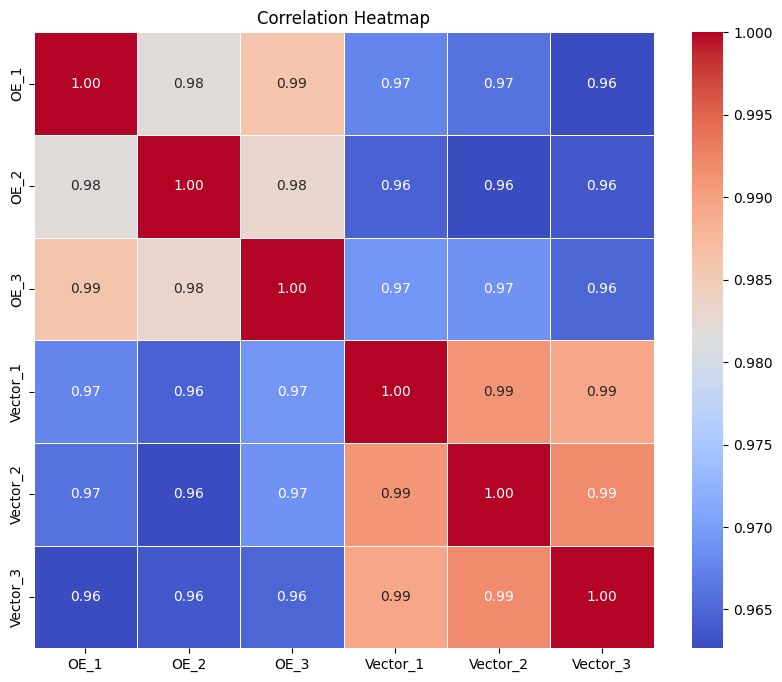

In [27]:
# corr_matrix = counts.corr()
# print(corr_matrix)

# pairs = [
#     ("OE_1", "OE_2"),
#     ("OE_1", "OE_3"),
#     #...
# ]

# for a, b in pairs:
#     r, p = pearsonr(counts[a], counts[b])
#     print(f"{a} vs {b}: {r:.3f}")

from scipy.stats import pearsonr
corr_matrix = counts.corr()
print("Correlation Matrix:")
print(corr_matrix)
pairs = [
    ("OE_1", "OE_2"),
    ("OE_1", "OE_3"),
    ("OE_2", "OE_3"),
    ("OE_3", "OE_2"),

]


print("\nPearson Correlation:")
for a, b in pairs:
    r, p = pearsonr(counts[a], counts[b])
    print(f"{a} vs {b}: {r:.3f}")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
counts = counts.T

In [29]:
counts

transcript_id,ENST00000642498,ENST00000618889,ENST00000642492,ENST00000496116,ENST00000496114,ENST00000496112,ENST00000496110,ENST00000160298,ENST00000506093,ENST00000600669,...,ENST00000566446,ENST00000566447,ENST00000566442,ENST00000687720,ENST00000687724,ENST00000339282,ENST00000687726,ENST00000702123,ENST00000332955,ENST00000332954
OE_1,1025.0,3.0,5.0,0.0,2.0,0.0,63.0,1104.0,2.0,2.0,...,305.0,2.0,0.0,25.0,58.0,163.0,49.0,0.0,21.0,5.0
OE_2,626.0,22.0,7.0,0.0,1.0,0.0,46.0,901.0,0.0,0.0,...,240.0,0.0,0.0,0.0,27.0,178.0,39.0,0.0,25.0,2.0
OE_3,435.0,1.0,6.0,2.0,1.0,0.0,87.0,947.0,0.0,0.0,...,234.0,6.0,8.0,0.0,53.0,164.0,35.0,0.0,9.0,3.0
Vector_1,456.0,2.0,3.0,2.0,1.0,0.0,28.0,930.0,0.0,0.0,...,226.0,1.0,3.0,0.0,9.0,183.0,22.0,1.0,16.0,0.0
Vector_2,272.0,6.0,51.0,2.0,3.0,37.0,21.0,1031.0,0.0,2.0,...,189.0,0.0,6.0,0.0,55.0,111.0,57.0,0.0,23.0,1.0
Vector_3,772.0,0.0,7.0,0.0,0.0,18.0,11.0,981.0,0.0,0.0,...,233.0,0.0,0.0,0.0,0.0,212.0,25.0,0.0,10.0,0.0


In [30]:
metadata = pd.DataFrame(zip(counts.index, ['OE','OE','OE','V', 'V', 'V']),
                        columns = ['Sample', 'Condition'])

In [31]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
OE_1,OE
OE_2,OE
OE_3,OE
Vector_1,V
Vector_2,V
Vector_3,V


In [32]:
dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="Condition")


#design_factors=["batch", "condition"] = ~ batch

In [33]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 107.39 seconds.

Fitting dispersion trend curve...
... done in 4.31 seconds.

Fitting MAP dispersions...
... done in 118.12 seconds.

Fitting LFCs...
... done in 101.50 seconds.

Refitting 0 outliers.



In [34]:
!pip install scanpy
import scanpy as sc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=e89b96f232e3c7713773cd6bb3dfcf9e2110d487b00329015159f7f5dcc2c2a9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=a4fd80b3b2f7d3ba638276971acb1d29db6252aad1141b145160d9f2edd9dde4
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built umap-learn session-info


In [35]:
dds

AnnData object with n_obs × n_vars = 6 × 111958
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [36]:
stat_res = DeseqStats(dds, contrast = ('Condition','V','OE'))

In [37]:
stat_res.summary()

Running Wald tests...
... done in 25.11 seconds.



Log2 fold change & Wald test p-value: Condition V vs OE
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
transcript_id                                                               
ENST00000642498  583.214529       -0.409420  0.647253 -0.632550  0.527028   
ENST00000618889    5.587836       -1.718923  1.739167 -0.988360  0.322976   
ENST00000642492   12.679225        1.753405  1.214002  1.444318  0.148650   
ENST00000496116    0.984934        1.039988  2.528710  0.411272  0.680873   
ENST00000496114    1.285059        0.034369  1.587002  0.021656  0.982722   
...                     ...             ...       ...       ...       ...   
ENST00000339282  165.798885        0.056266  0.428282  0.131376  0.895478   
ENST00000687726   36.711974       -0.210723  0.564672 -0.373178  0.709016   
ENST00000702123    0.172610        1.007543  4.425477  0.227669  0.819904   
ENST00000332955   16.935798       -0.131390  0.689277 -0.190620  0.848823   
ENST00000332954    1

In [38]:
res = stat_res.results_df

In [40]:
res = res[res.baseMean >= 10]

In [41]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
transcript_id,,,,,,
ENST00000642498,583.214529,-0.409420,0.647253,-0.632550,0.527028,0.942698
ENST00000642492,12.679225,1.753405,1.214002,1.444318,0.148650,0.595185
ENST00000496110,41.417544,-1.653731,0.593445,-2.786662,0.005325,0.082584
ENST00000160298,960.834419,0.042718,0.168809,0.253058,0.800223,0.990483
ENST00000662513,10.029218,-6.775426,2.320806,-2.919427,0.003507,0.061198
...,...,...,...,...,...,...
ENST00000566446,232.632359,-0.211812,0.282613,-0.749477,0.453570,0.910141
ENST00000687724,32.275995,-1.096999,1.575547,-0.696265,0.486263,0.926908
ENST00000339282,165.798885,0.056266,0.428282,0.131376,0.895478,0.995314


In [42]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [48]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
transcript_id,,,,,,
ENST00000524132,34.429136,1.821143,0.555591,3.277851,1.046008e-03,2.545574e-02
ENST00000599690,21.246534,-7.858745,2.159289,-3.639506,2.731612e-04,9.028875e-03
ENST00000529415,20.738393,1.793449,0.483418,3.709933,2.073142e-04,7.265449e-03
ENST00000358514,563.995067,-1.436193,0.417125,-3.443073,5.751442e-04,1.617561e-02
ENST00000598141,42.554287,-1.538769,0.400078,-3.846170,1.199784e-04,4.697080e-03
...,...,...,...,...,...,...
ENST00000296026,36.470621,-1.959824,0.424892,-4.612521,3.978149e-06,2.558619e-04
ENST00000484809,107.368584,1.142872,0.305977,3.735157,1.875980e-04,6.761158e-03
ENST00000698181,45.420827,-8.955174,2.424793,-3.693170,2.214761e-04,7.660686e-03


In [44]:
!pip install sanbomics
from sanbomics.plots import volcano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00


In [45]:
!pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.6 MB/s eta 0:00:00


In [49]:
sc.tl.pca(dds)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


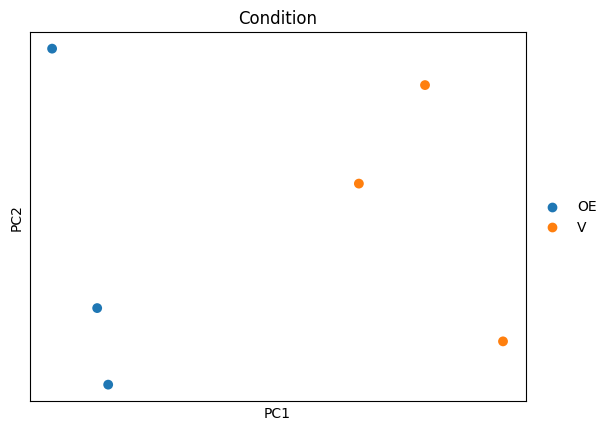

In [50]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [51]:

from gseapy.plot import gseaplot

In [52]:
sigs.dropna(inplace=True)

<ipython-input-52-4e317d1f181e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs.dropna(inplace=True)


In [53]:
ranking = res[['stat']].dropna().sort_values('stat', ascending = False)
ranking

,stat
transcript_id,
ENST00000219022,17.980483
ENST00000551956,16.158630
ENST00000280481,15.666831
ENST00000419304,14.555932
ENST00000396432,14.466455
...,...
ENST00000361157,-19.618110
ENST00000167586,-22.074164
ENST00000371804,-22.322680


In [54]:
dds.layers['normed_counts']

array([[949.31282428,   2.77847656,   4.63079426, ...,   0.        ,
         19.44933591,   4.63079426],
       [626.        ,  22.        ,   7.        , ...,   0.        ,
         25.        ,   2.        ],
       [420.87436924,   0.96752729,   5.80516371, ...,   0.        ,
          8.70774557,   2.90258186],
       [472.26043205,   2.07131768,   3.10697653, ...,   1.03565884,
         16.57054148,   0.        ],
       [258.83954757,   5.7096959 ,  48.53241517, ...,   0.        ,
         21.88716763,   0.95161598],
       [772.        ,   0.        ,   7.        , ...,   0.        ,
         10.        ,   0.        ]])

In [55]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [56]:
dds.layers['log1p']

array([[6.85679122, 1.3293209 , 1.72825051, ..., 0.        , 3.01795041,
        1.72825051],
       [6.44094654, 3.13549422, 2.07944154, ..., 0.        , 3.25809654,
        1.09861229],
       [6.04470757, 0.67677757, 1.91768169, ..., 0.        , 2.27292408,
        1.36163835],
       [6.15964583, 1.12210668, 1.41268712, ..., 0.71081952, 2.86622372,
        0.        ],
       [5.56006432, 1.90355363, 3.90262731, ..., 0.        , 3.13057639,
        0.66865774],
       [6.65027905, 0.        , 2.07944154, ..., 0.        , 2.39789527,
        0.        ]])

In [57]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
transcript_id,,,,,,
ENST00000524132,34.429136,1.821143,0.555591,3.277851,1.046008e-03,2.545574e-02
ENST00000599690,21.246534,-7.858745,2.159289,-3.639506,2.731612e-04,9.028875e-03
ENST00000529415,20.738393,1.793449,0.483418,3.709933,2.073142e-04,7.265449e-03
ENST00000358514,563.995067,-1.436193,0.417125,-3.443073,5.751442e-04,1.617561e-02
ENST00000598141,42.554287,-1.538769,0.400078,-3.846170,1.199784e-04,4.697080e-03
...,...,...,...,...,...,...
ENST00000296026,36.470621,-1.959824,0.424892,-4.612521,3.978149e-06,2.558619e-04
ENST00000484809,107.368584,1.142872,0.305977,3.735157,1.875980e-04,6.761158e-03
ENST00000698181,45.420827,-8.955174,2.424793,-3.693170,2.214761e-04,7.660686e-03


In [58]:

dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 2771
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [59]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


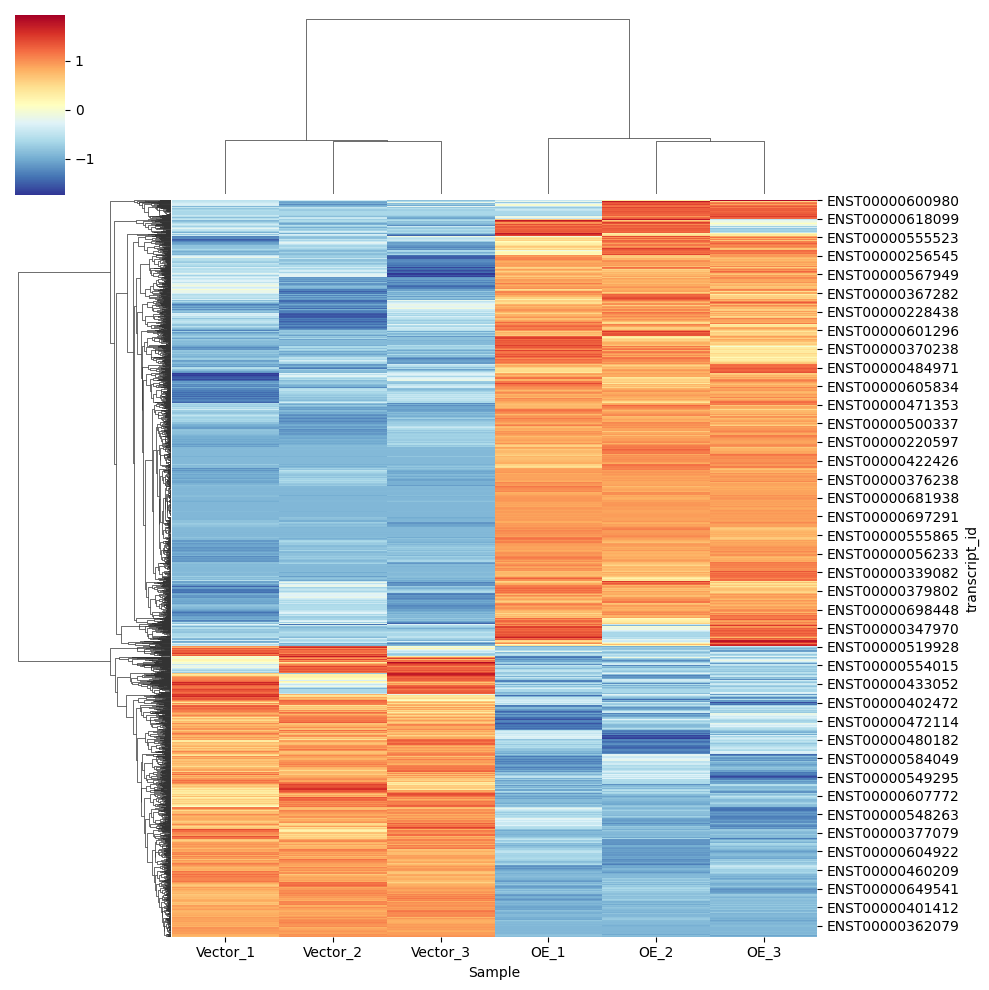

In [60]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

Text(0, 0.5, '-log10 p-value')

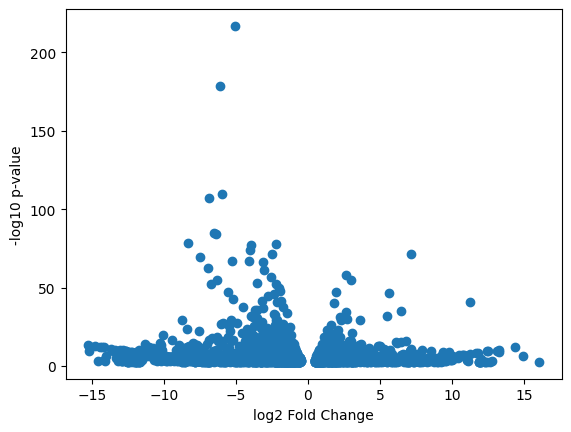

In [61]:

# Volcano plot
plt.scatter(sigs['log2FoldChange'], -np.log10(sigs['pvalue']))
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 p-value')


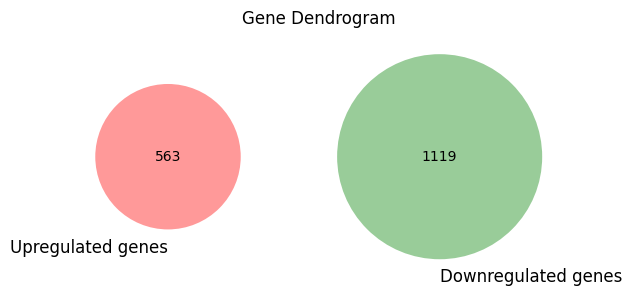

In [80]:

from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
from matplotlib_venn import venn2


# Dendrogram
gene_linkage = linkage(sigs[["baseMean"]], method="average")
gene_dendrogram = dendrogram(gene_linkage)
plt.title("Gene Dendrogram")

# Venn Diagram
up_genes = list(sigs.query("log2FoldChange > 2")["transcript_id"])
down_genes = list(sigs.query("log2FoldChange < -2")["transcript_id"])
venn2(subsets=(len(up_genes), len(down_genes), len(set(up_genes) & set(down_genes))),
      set_labels=("Upregulated genes", "Downregulated genes"))

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatterplot of Expression vs Fold Change')

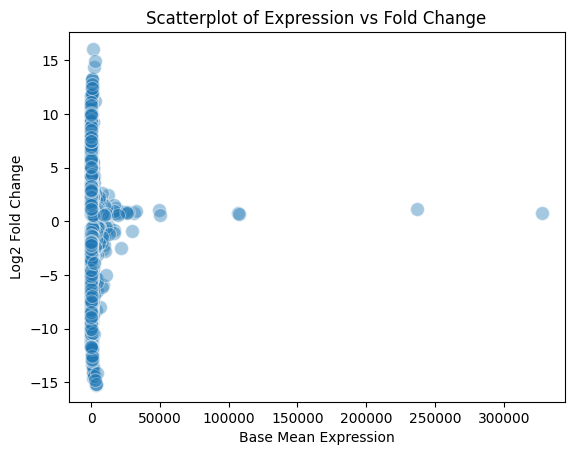

In [81]:
# Identifies genes with both high expression and large fold changes (up or down). These tend to be biologically important and are outliers.
# Reveals the overall relationship and correlation (or lack of correlation) between basal expression level and differential expression.
# Can spot subgroups of genes with similar direction and magnitude of expression changes. Potential co-regulated gene clusters.
sns.scatterplot(data=sigs,
                x="baseMean",
                y="log2FoldChange",
                alpha=0.4,
                s=100)

plt.xlabel("Base Mean Expression")
plt.ylabel("Log2 Fold Change")
plt.title("Scatterplot of Expression vs Fold Change")


Text(0.5, 1.0, 'Box Plot of Expression')

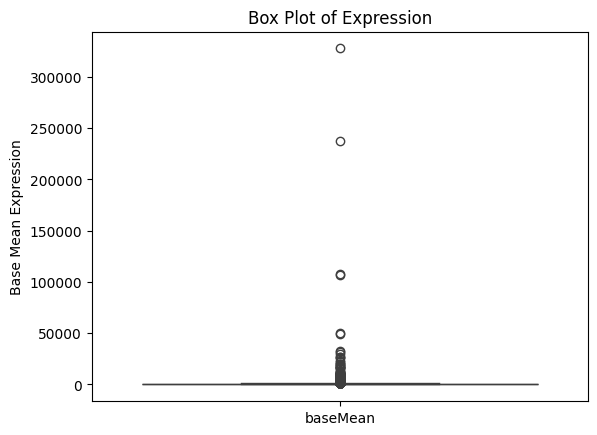

In [79]:
# This showing the distribution of the baseMean values across all genes in the dataset.

# The boxplot shows the median, 25th/75th percentiles, and outlier cutoffs for the baseMean column vector
# It visualizes the center, variability, range, and potential outliers of gene expression values
# So this compact summary plot is representing the overall distribution of expression levels for all genes.

# Some key insights it provides:

# Center/median expression level
# Spread of expression values (interquartile range from 25th to 75th percentile)
# Presence of outlier genes with very low or high expression
# Overall range and variation of expression levels
sns.boxplot(sigs[["baseMean"]])
plt.ylabel("Base Mean Expression")
plt.title("Box Plot of Expression")